In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os

import warnings
warnings.filterwarnings('ignore')

Future Engineering

In [71]:
data = pd.read_csv('train.csv')
data

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,Green-House,Find Home,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,6
17992,Micatone,All Gone,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,2
17993,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,8
17994,Beherit,Salomon's Gate,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,8


In [72]:
#Данные и так оказались в числовом формате.
# numeric_cols = ['Popularity', 'energy', 'danceability', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_in min/ms']
# data[numeric_cols] = data[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Размерность данных
print(f"Размер данных: {data.shape}")

# Типы данных
print("\nТипы данных в столбцах:")
print(data.dtypes)

# Пропуски
print("\nКоличество пропущенных значений:")
print(data.isnull().sum())

# Основные статистики
print("\nОсновные статистики числовых столбцов:")
print(data.describe())

Размер данных: (17996, 17)

Типы данных в столбцах:
Artist Name            object
Track Name             object
Popularity            float64
danceability          float64
energy                float64
key                   float64
loudness              float64
mode                    int64
speechiness           float64
acousticness          float64
instrumentalness      float64
liveness              float64
valence               float64
tempo                 float64
duration_in min/ms    float64
time_signature          int64
Class                   int64
dtype: object

Количество пропущенных значений:
Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in 

Дубликатов в датасете нет.

In [74]:
print(len(data))
data = data.drop_duplicates()
print(len(data))

17996
17996


Было принято решение удалить все строки с пропусками. Объём данных позволяет, и инструментальность может быть очень важным параметром.

In [73]:
data_without_passes = data.copy()
data_without_passes.dropna(inplace=True)
print(data_without_passes.shape)

(11813, 17)


Первым делом - мы не удаляем выбросы по простой причине - например громкость зависит от жанра, что очень легко проследить. Все жанры кроме 7-ого относительно громкие, выбросы также везде разные. Так например у 0, 3 и 4-ого класса они минимальны. Также и со всеми остальными параметрами!

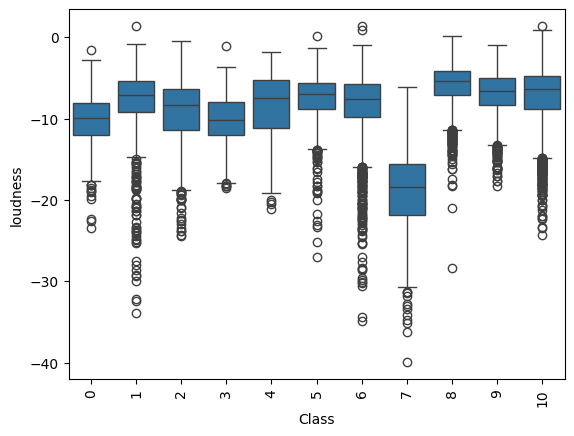

In [75]:
sns.boxplot(x='Class', y='loudness', data=data)
plt.xticks(rotation=90)
plt.show()

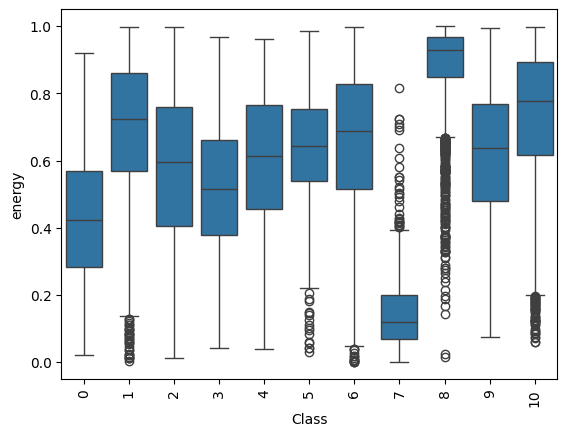

In [76]:
sns.boxplot(x='Class', y='energy', data=data)
plt.xticks(rotation=90)
plt.show()

Нечисловые столбцы:
Index(['Artist Name', 'Track Name'], dtype='object')


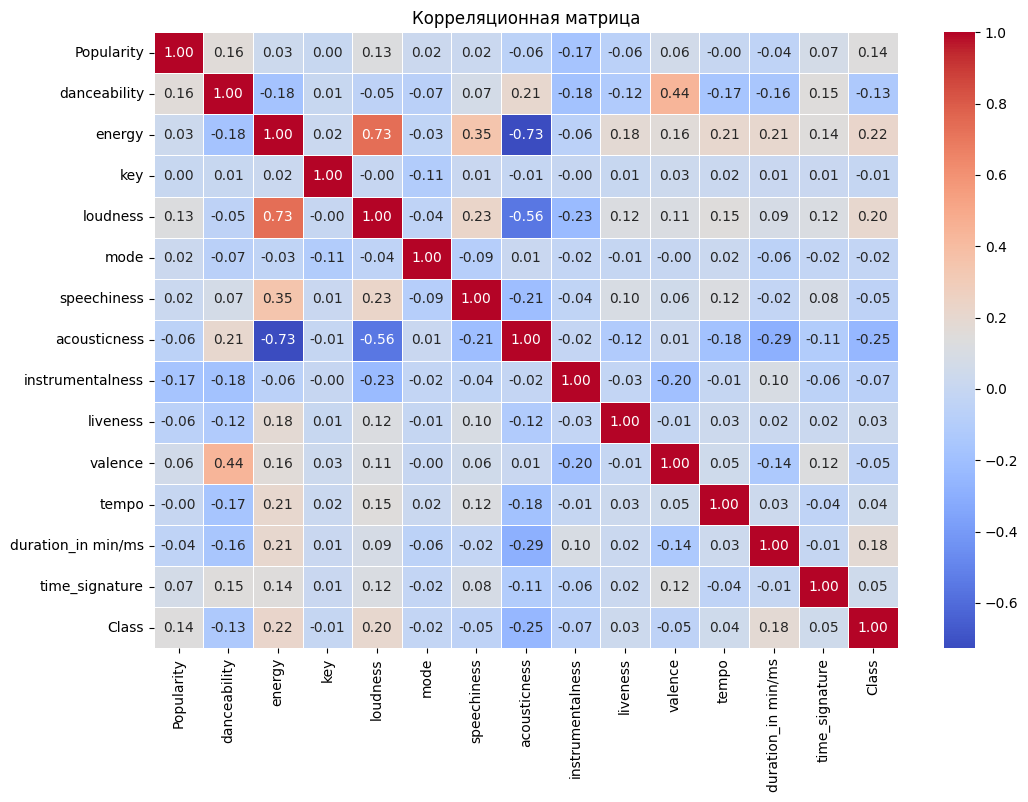

In [77]:
corr_matrix = data.select_dtypes(include=['number']).corr(method='spearman')
non_numeric_columns = data.select_dtypes(exclude=['number']).columns
df = data.drop(non_numeric_columns, axis=1)
print("Нечисловые столбцы:")
print(non_numeric_columns)


corr_matrix = df.corr(method='spearman')
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Корреляционная матрица")
plt.show()

